In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
west = pd.read_csv(dir + 'new_geom_factors/old/amphibious_ERT_western_transect2_edit.dat', sep='\s+', skiprows=9, header=None)
header = pd.read_table(dir + 'new_geom_factors/old/amphibious_ERT_western_transect2_edit.dat', nrows=9, header=None)
west


,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.5959,235.0,-1.3340,105.0,-0.0069,130.0,8.9327,72.64
1,4,0.0,-2.5959,230.0,-1.0545,105.0,-0.0069,125.0,5.4621,62.87
2,4,0.0,-2.5959,220.0,-0.7841,100.0,-0.7305,120.0,1.9574,26.38
3,4,0.0,-2.5959,210.0,-0.5138,95.0,-1.1040,115.0,0.4500,10.57
4,4,0.0,-2.5959,200.0,-0.2110,90.0,-1.6560,110.0,-0.2715,7.08
...,...,...,...,...,...,...,...,...,...,...
1107,4,285.0,-5.0320,300.0,-5.5727,290.0,-5.1920,295.0,-5.3922,1.10
1108,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rC1P1 = np.abs(west.iloc[:, 5] - west.iloc[:, 1])
rC2P1 = np.abs(west.iloc[:, 5] - west.iloc[:, 3])
rC1P2 = np.abs(west.iloc[:, 7] - west.iloc[:, 1])
rC2P2 = np.abs(west.iloc[:, 7] - west.iloc[:, 3])
K = 2 * np.pi * 1/((1/rC1P1) - (1/rC2P1) - (1/rC1P2) + (1/rC2P2))
K

0       1715.309589
1       2061.670179
2       1884.955592
3       1716.094987
4       1555.088364
           ...     
1107      31.415927
1108            NaN
1109            NaN
1110            NaN
1111            NaN
Length: 1112, dtype: float64

In [5]:
west.iloc[:, 9] = (west.iloc[:, 9])/K
west

,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.5959,235.0,-1.3340,105.0,-0.0069,130.0,8.9327,0.042348
1,4,0.0,-2.5959,230.0,-1.0545,105.0,-0.0069,125.0,5.4621,0.030495
2,4,0.0,-2.5959,220.0,-0.7841,100.0,-0.7305,120.0,1.9574,0.013995
3,4,0.0,-2.5959,210.0,-0.5138,95.0,-1.1040,115.0,0.4500,0.006159
4,4,0.0,-2.5959,200.0,-0.2110,90.0,-1.6560,110.0,-0.2715,0.004553
...,...,...,...,...,...,...,...,...,...,...
1107,4,285.0,-5.0320,300.0,-5.5727,290.0,-5.1920,295.0,-5.3922,0.035014
1108,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
header_str = header.to_csv(index=False, header=False, sep='\t')

# Save the result to a new file
output_file = dir + 'new_geom_factors/resistance/west_from_my_file.dat'

# Open the file and write the header first, followed by the data
with open(output_file, 'w') as f:
    # Write the header string first
    f.write(header_str)
    
    # Then append the data (without the header)
    west.to_csv(f, sep='\t', index=False, header=False)

In [8]:
data = ert.load(dir + 'new_geom_factors/resistance/west_from_my_file.dat')
data.save(dir+"new_geom_factors/resistance/west_from_my_file.txt", "a b m n err r")

15/10/24 - 10:55:37 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [9]:
data = ert.load(dir+"new_geom_factors/resistance/west_from_my_file.txt")

In [10]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
data['rhoa'] = data['r'] * data['k']
mgr = ert.ERTManager(data)


15/10/24 - 10:57:26 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
15/10/24 - 10:57:31 - pyGIMLi - INFO - Save RVector binary
15/10/24 - 10:57:31 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\8390719412192767681


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2bf21425e10>)

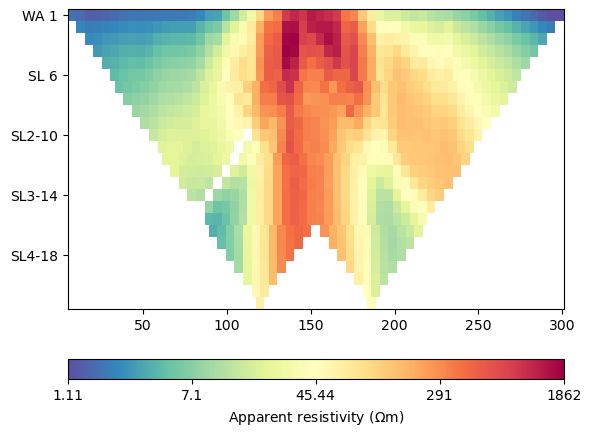

In [11]:
ert.showData(data)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2bf2e8054d0>)

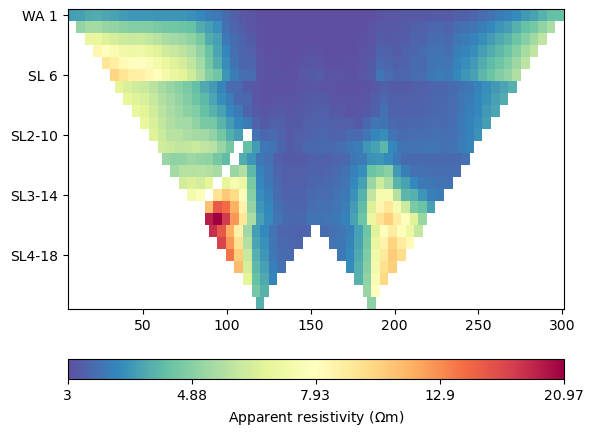

In [12]:

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

15/10/24 - 11:02:11 - pyGIMLi - INFO - Found 2 regions.
15/10/24 - 11:02:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 11:02:11 - pyGIMLi - INFO - Found 2 regions.
15/10/24 - 11:02:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 11:02:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 11:02:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 11:02:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2958 Cells: 5484 Boundaries: 4328
15/10/24 - 11:02:11 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 11:02:11 - pyGIMLi - INFO - Created startmodel from forward operator: 1158, min/max=79.923866/79.923866
15/10/24 - 11:02:11 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF22C9D9E0>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1958.68
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  504.03 (dPhi = 74.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   60.55 (dPhi = 87.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   25.55 (dPhi = 54.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    7.18 (dPhi = 62.50%) lam: 20.0
----------

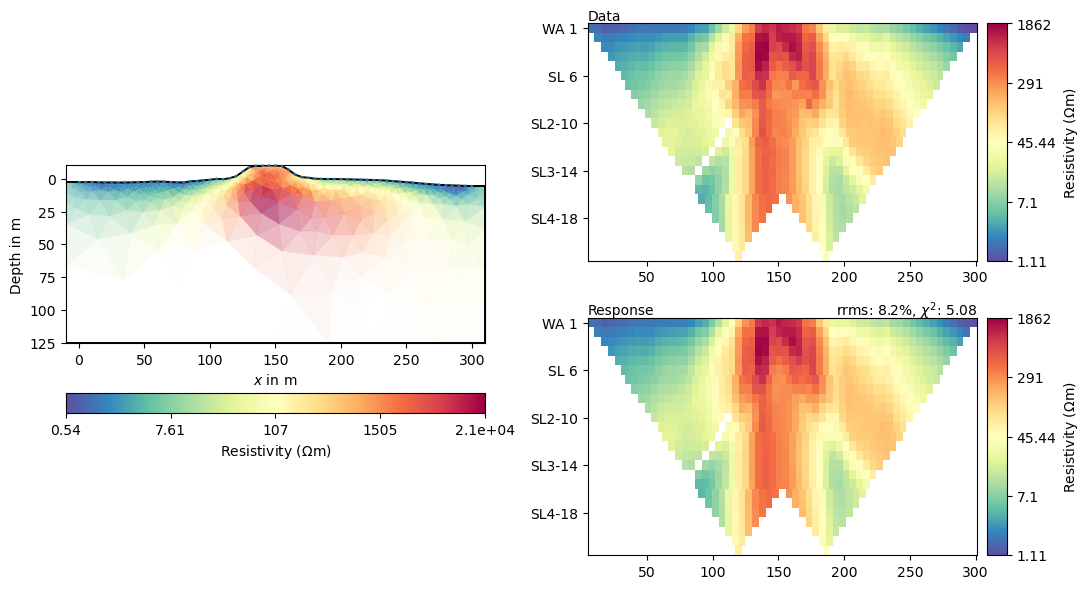

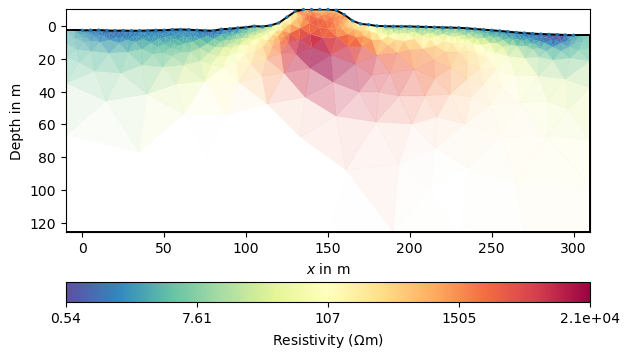

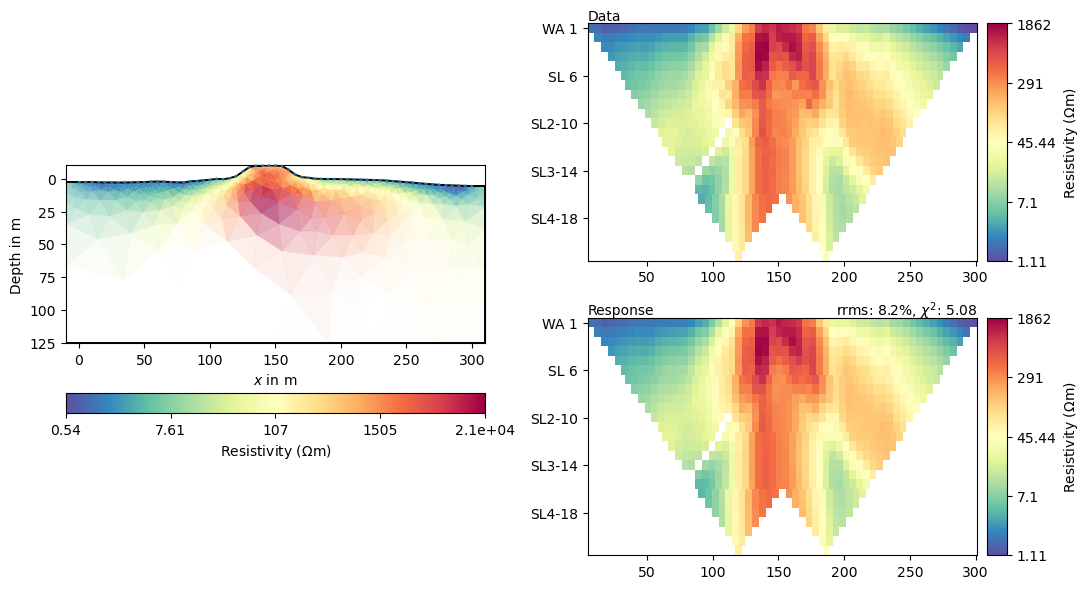

In [13]:

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

0 -10.002512966250032 -2.5959 0.0
1 -10.002512966250032 -125.5727 0.0
2 310.00251296625004 -125.5727 0.0
3 310.00251296625004 -5.5727 0.0
4 -1210.00251296625 -2.5959 0.0
5 -1210.00251296625 -1322.5959 0.0
6 1510.00251296625 -5.5727 0.0
7 1510.00251296625 -1325.5727 0.0
8 0.0 -2.5959 0.0
9 1.25 -2.567875 0.0
10 3.75 -2.511825 0.0
11 5.0 -2.4838 0.0
12 6.25 -2.462625 0.0
13 8.75 -2.4202749999999997 0.0
14 10.0 -2.3991 0.0
15 11.25 -2.4665 0.0
16 13.75 -2.6012999999999997 0.0
17 15.0 -2.6687 0.0
18 16.25 -2.6971749999999997 0.0
19 18.75 -2.754125 0.0
20 20.0 -2.7826 0.0
21 21.25 -2.765925 0.0
22 23.75 -2.7325749999999998 0.0
23 25.0 -2.7159 0.0
24 26.25 -2.74455 0.0
25 28.75 -2.80185 0.0
26 30.0 -2.8305 0.0
27 31.25 -2.818975 0.0
28 33.75 -2.7959249999999995 0.0
29 35.0 -2.7843999999999998 0.0
30 36.25 -2.7641 0.0
31 38.75 -2.7234999999999996 0.0
32 40.0 -2.7032 0.0
33 41.25 -2.657425 0.0
34 43.75 -2.5658749999999997 0.0
35 45.0 -2.5201 0.0
36 46.25 -2.514 0.0
37 48.75 -2.5018 0.0
38 50.0

(-50.0, 381.0)

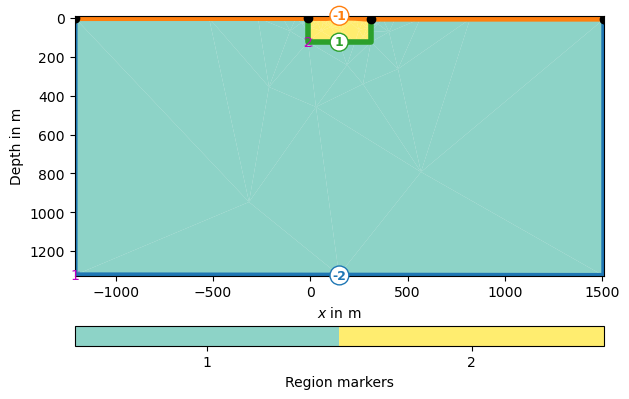

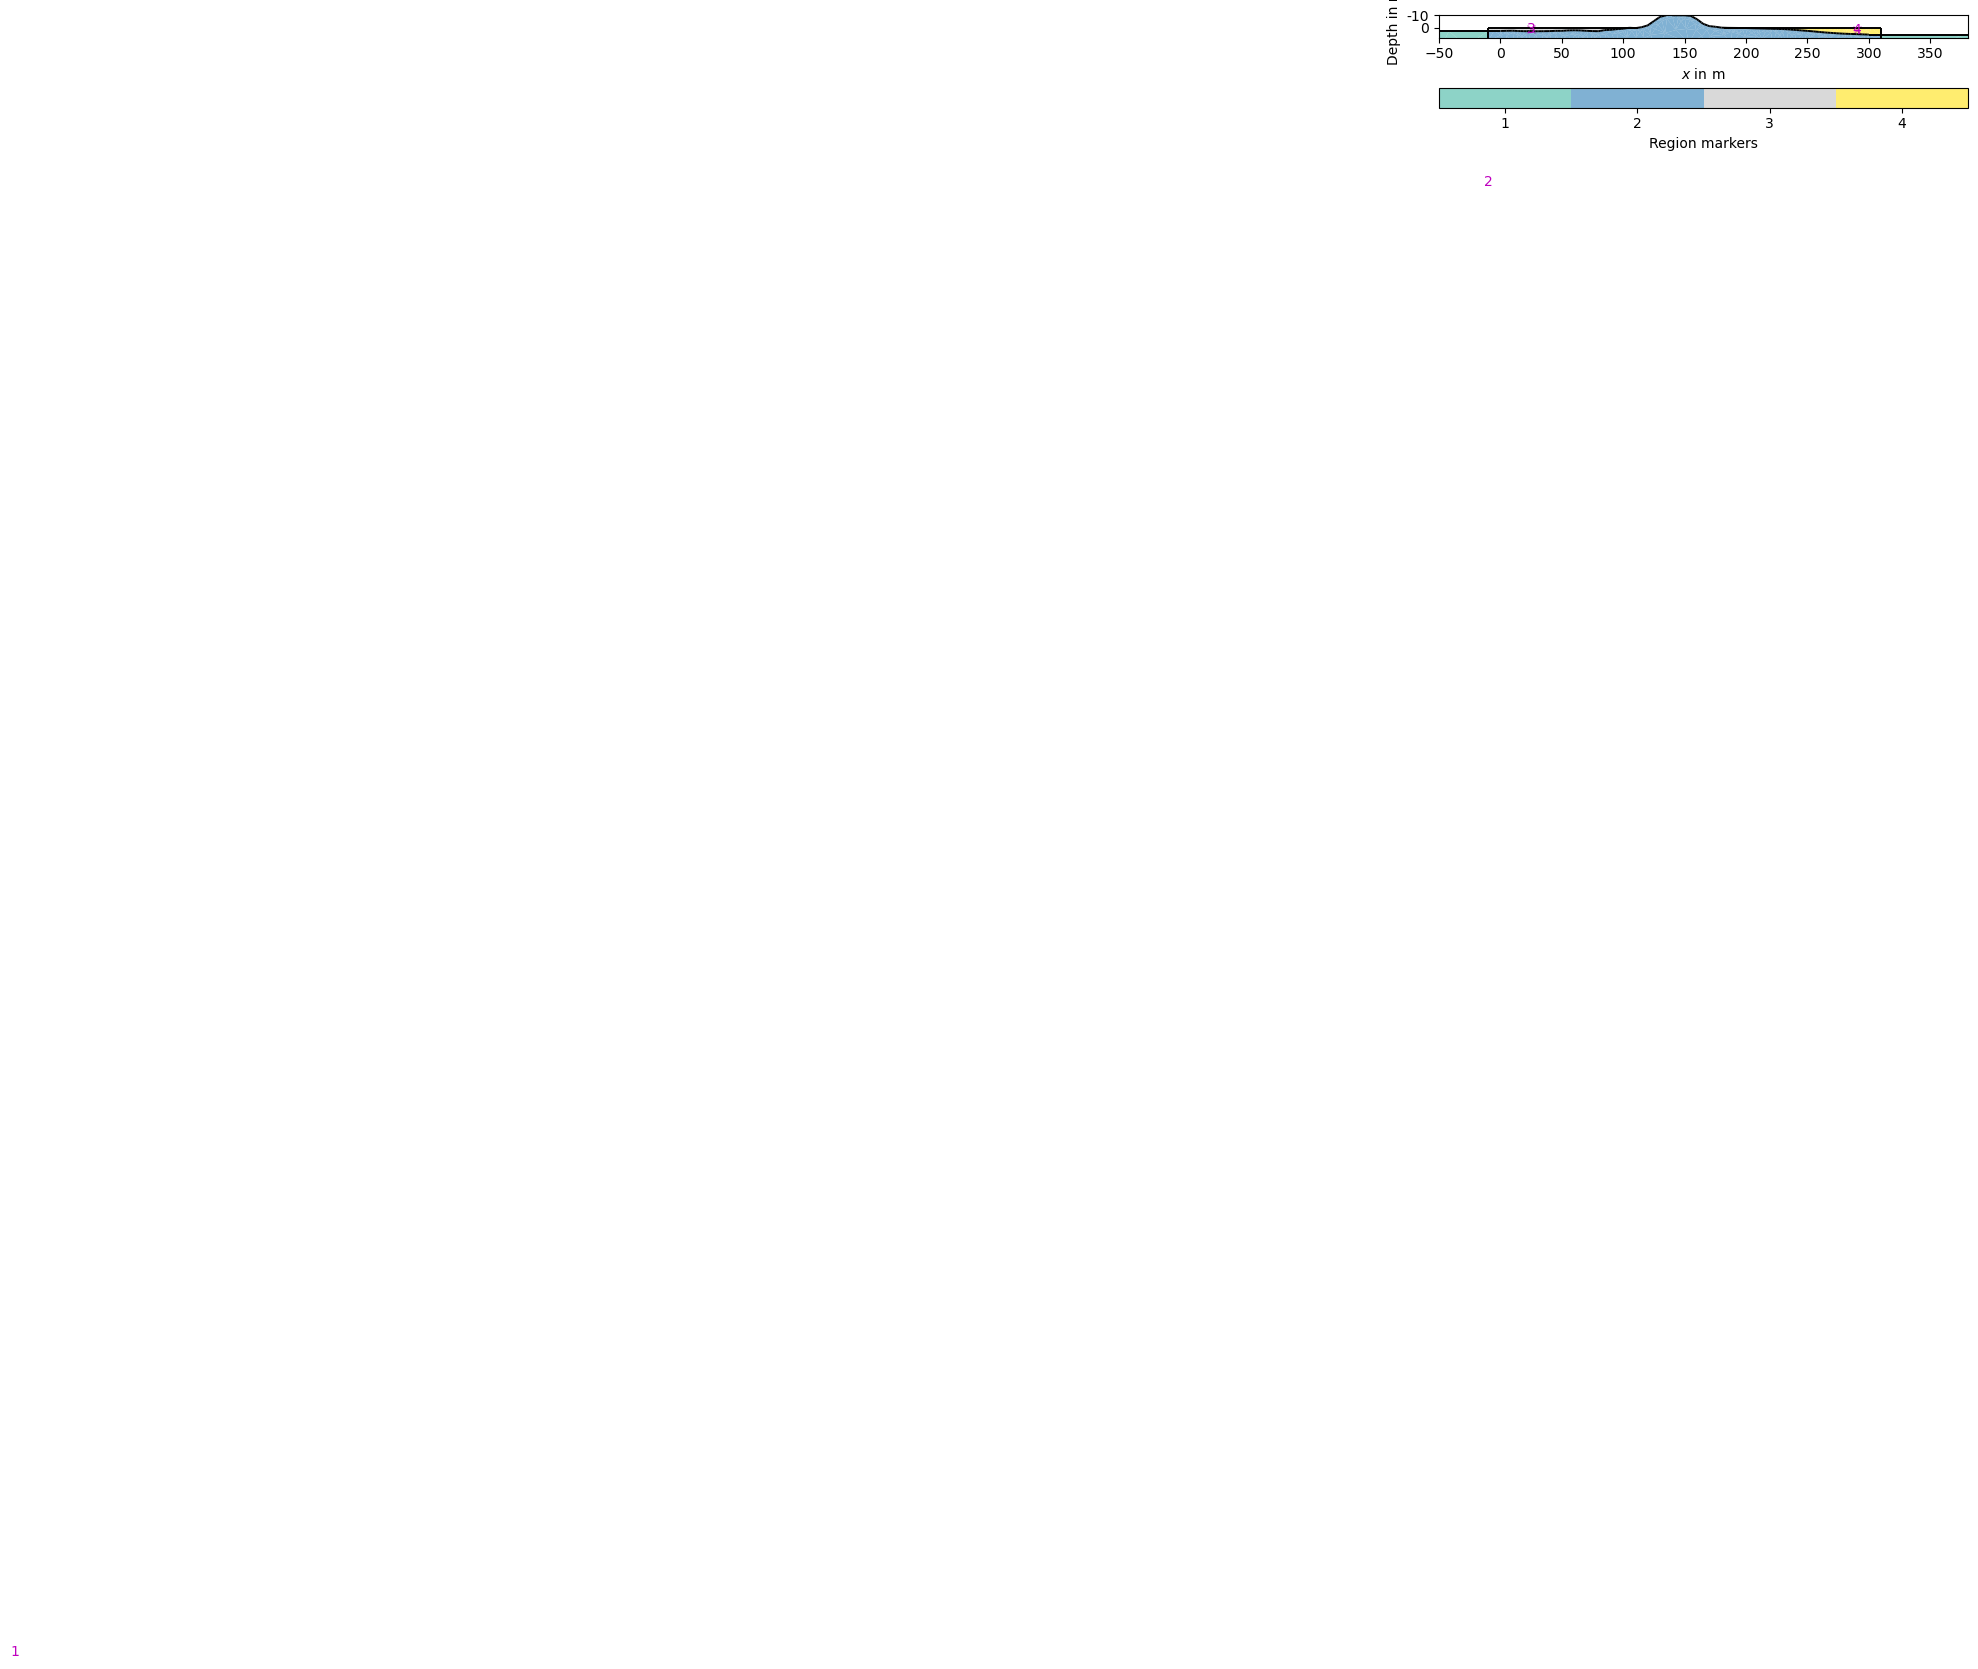

In [15]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)

plc.createNode(-10.002512966250032, 0, 0, marker=189)
plc.createNode(112, 0, 0, marker=190)
plc.createNode(182, 0, 0, marker=191)
plc.createNode(310.00251296625004 , 0, 0, marker=192)

plc.createEdge(plc.node(189), plc.node(190), marker=-1)
plc.createEdge(plc.node(189), plc.node(0), marker=-1)
plc.createEdge(plc.node(191), plc.node(192), marker=-1)
plc.createEdge(plc.node(192), plc.node(3), marker=-1)

plc.addRegionMarker([25, -1], marker=3)  
plc.addRegionMarker([290, -1.5], marker=4)  

ax, _ = pg.show(plc)
ax.set_ylim(-8)
ax.set_xlim(-50,381)

(-130.0, 381.0)

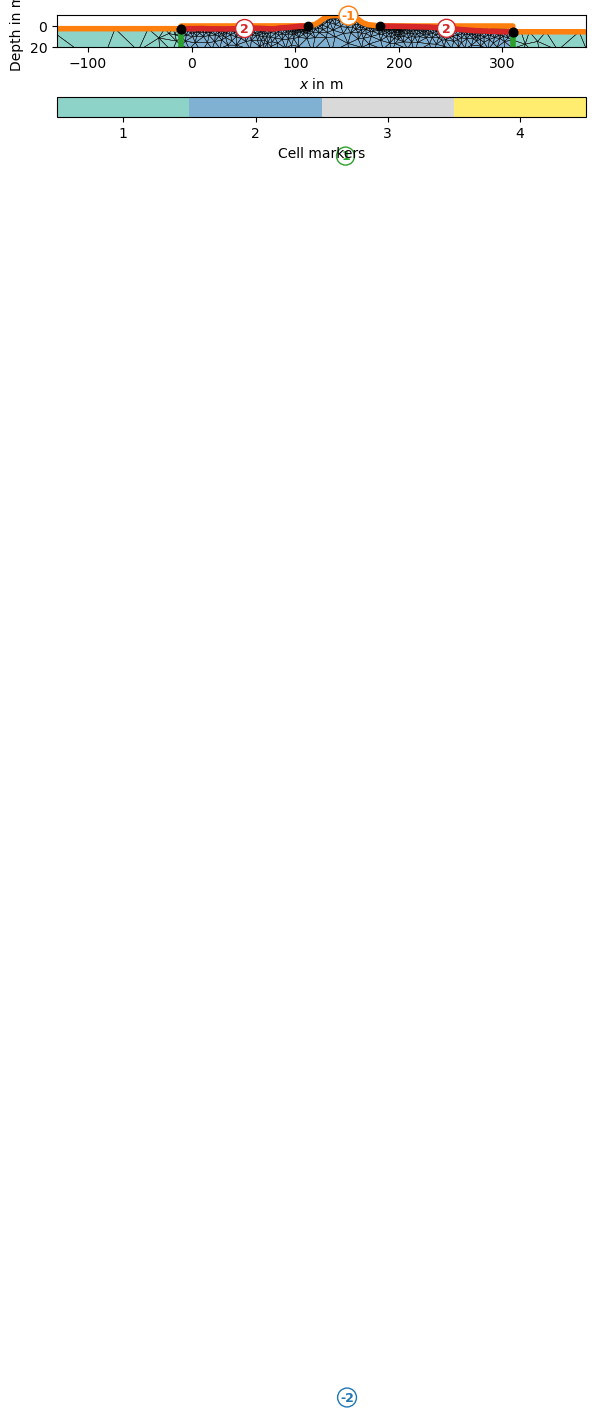

In [16]:
mesh = mt.createMesh(plc)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.set_ylim(-20)
ax.set_xlim(-130,381)

15/10/24 - 15:29:35 - pyGIMLi - INFO - Found 4 regions.
15/10/24 - 15:29:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 15:29:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 15:29:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 15:29:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8560 Cells: 16244 Boundaries: 12620
15/10/24 - 15:29:36 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 15:29:36 - pyGIMLi - INFO - Created startmodel from forward operator: 3824, min/max=79.923866/79.923866
15/10/24 - 15:29:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE3B50>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE36F0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE33E0>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1898.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  644.25 (dPhi = 65.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   55.08 (dPhi = 91.08%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   21.36 (dPhi = 57.66%) lam: 20.0


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bfa4006950>)

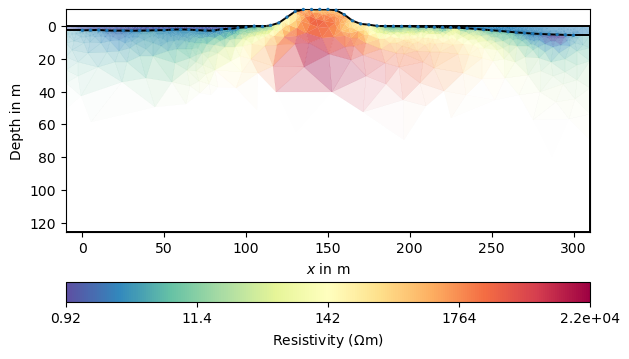

In [36]:
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, limits=[0.1, 1.3], trans="log")
mgr.inv.setRegularization(4, limits=[0.1, 2.5], trans="log")

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

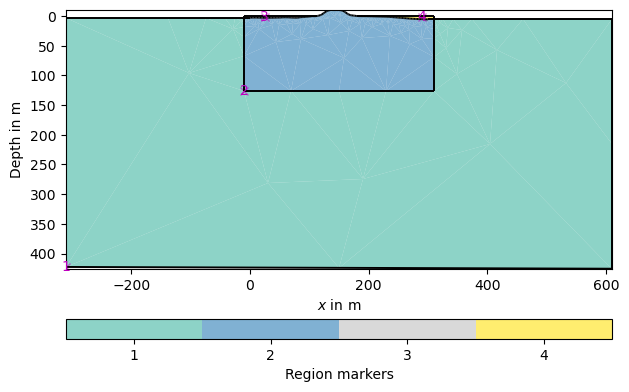

In [7]:


l1 = mt.createLine([-10,0], [-10, -2.5959])
#l2 = mt.createLine([-10,0], [110, 0])
l2 = mt.createLine([-10,0], [113.47962306342757, 0])
l3 = mt.createLine([180,0], [310.00151296625006, 0])
l4 = mt.createLine([310.00151296625006,0], [310.00151296625006, -6])

plc2 = plc + l1 + l2 + l3 + l4
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([290, -1.5], marker=4)  
#pg.show(plc2)
ax, _ = pg.show(plc2)
#ax.set_ylim(-8)
#ax.set_xlim(-50,381)

15/10/24 - 15:22:57 - pyGIMLi - INFO - Found 4 regions.
15/10/24 - 15:22:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 15:22:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 15:22:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 15:22:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8560 Cells: 16244 Boundaries: 12620
15/10/24 - 15:22:57 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 15:22:57 - pyGIMLi - INFO - Created startmodel from forward operator: 3824, min/max=79.923866/79.923866
15/10/24 - 15:22:57 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE2880>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE21F0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002BF98FE2CE0>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1898.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  516.51 (dPhi = 72.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   71.72 (dPhi = 85.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   10.86 (dPhi = 80.75%) lam: 20.0


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bfa3e87e50>)

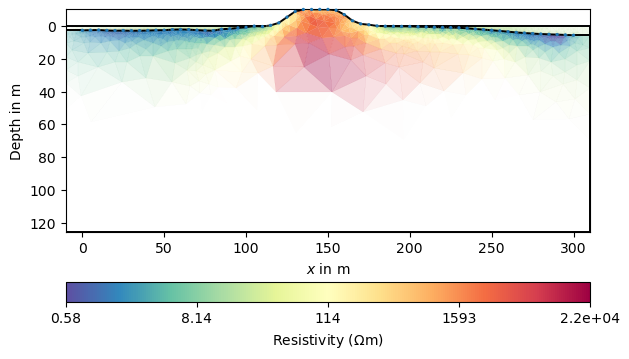

In [35]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, limits=[0, 20], trans="log")
mgr.inv.setRegularization(4, limits=[0, 20], trans="log")

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

15/10/24 - 15:45:23 - pyGIMLi - INFO - Found 4 regions.
15/10/24 - 15:45:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 15:45:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 15:45:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 15:45:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8560 Cells: 16244 Boundaries: 12620
15/10/24 - 15:45:24 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 15:45:24 - pyGIMLi - INFO - Created startmodel from forward operator: 2963, min/max=79.923866/79.923866
15/10/24 - 15:45:24 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF9C7969D0>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1637.98
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  610.16 (dPhi = 62.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   58.08 (dPhi = 89.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   38.58 (dPhi = 32.03%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   23.42 (dPhi = 34.81%) l

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bfa3dd15d0>)

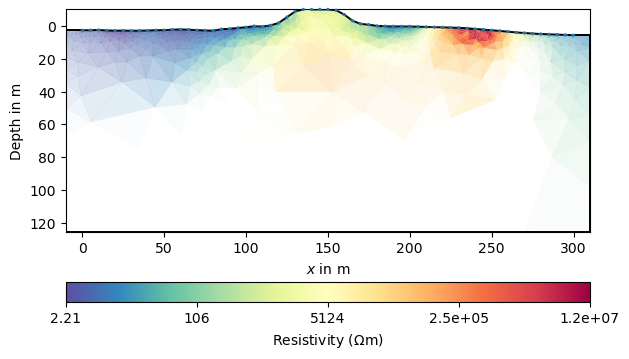

In [37]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, fix=1)
mgr.inv.setRegularization(4, fix=1)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

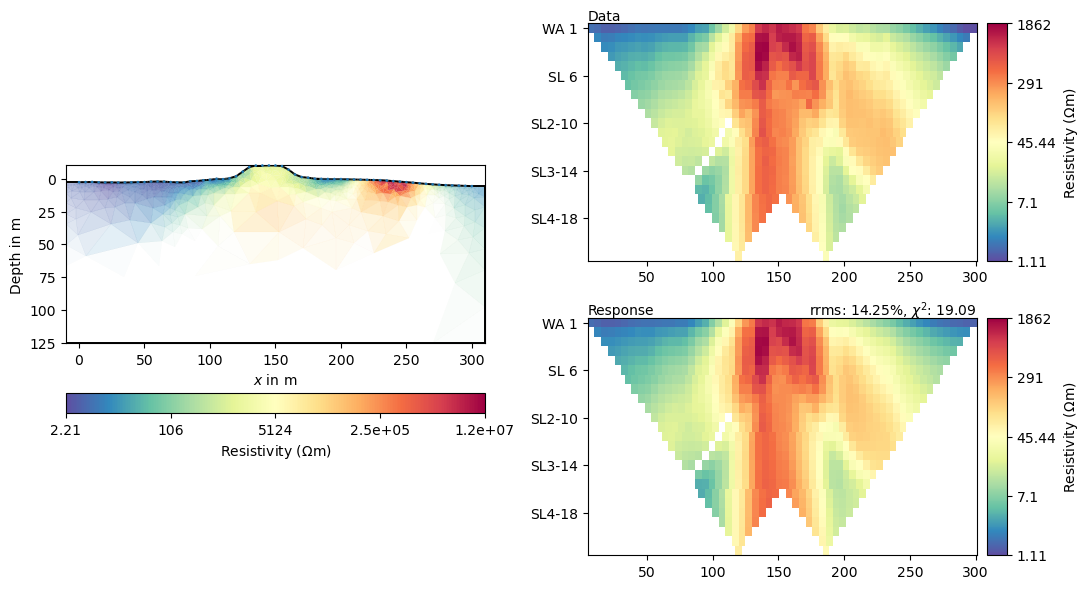

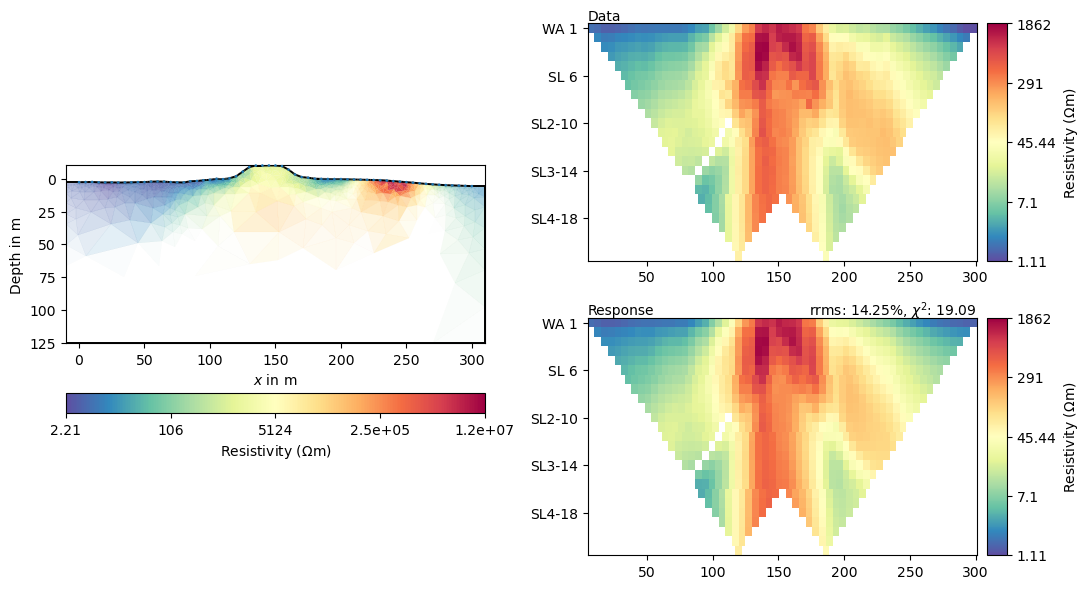

In [38]:
mgr.showResultAndFit()

15/10/24 - 15:53:58 - pyGIMLi - INFO - Found 4 regions.
15/10/24 - 15:53:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 15:53:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 15:53:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 15:53:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8560 Cells: 16244 Boundaries: 12620
15/10/24 - 15:53:59 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 15:53:59 - pyGIMLi - INFO - Created startmodel from forward operator: 2965, min/max=79.923866/79.923866
15/10/24 - 15:53:59 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF9C795700>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002BF9C795150>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002BF9C7965E0>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1898.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  527.87 (dPhi = 72.03%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  261.32 (dPhi = 50.35%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   13.18 (dPhi = 93.92%) lam: 20.0


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bf98f56410>)

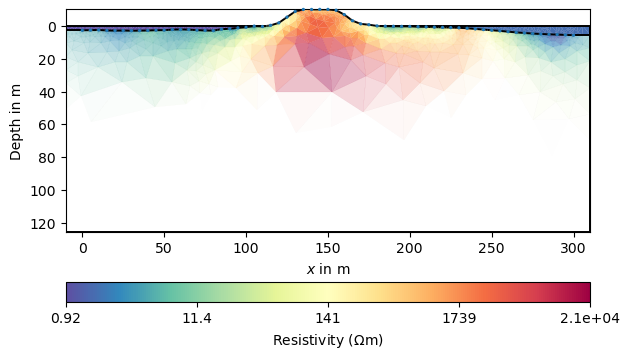

In [39]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

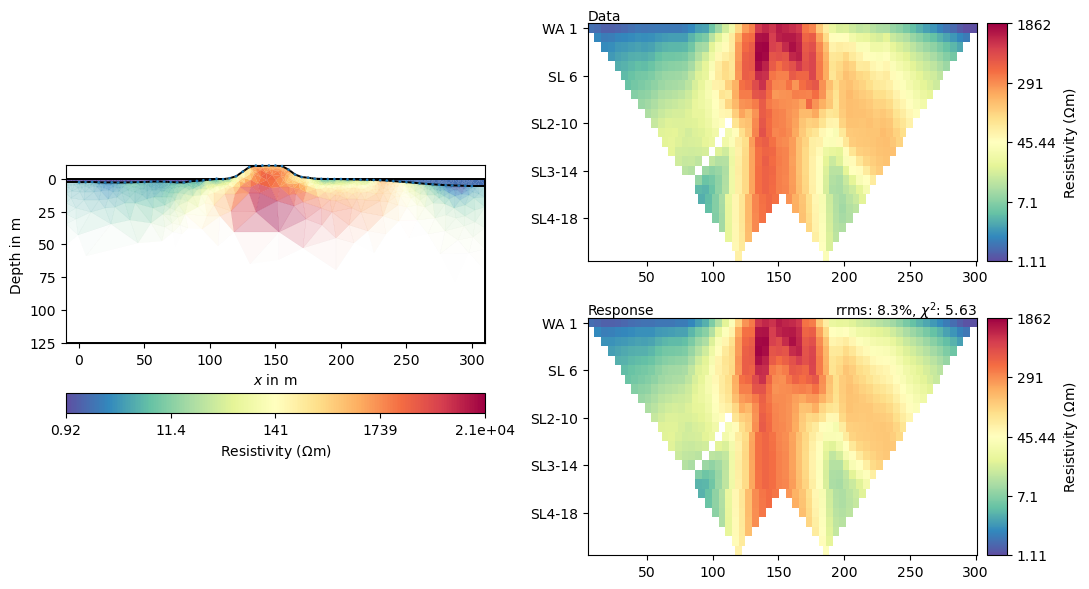

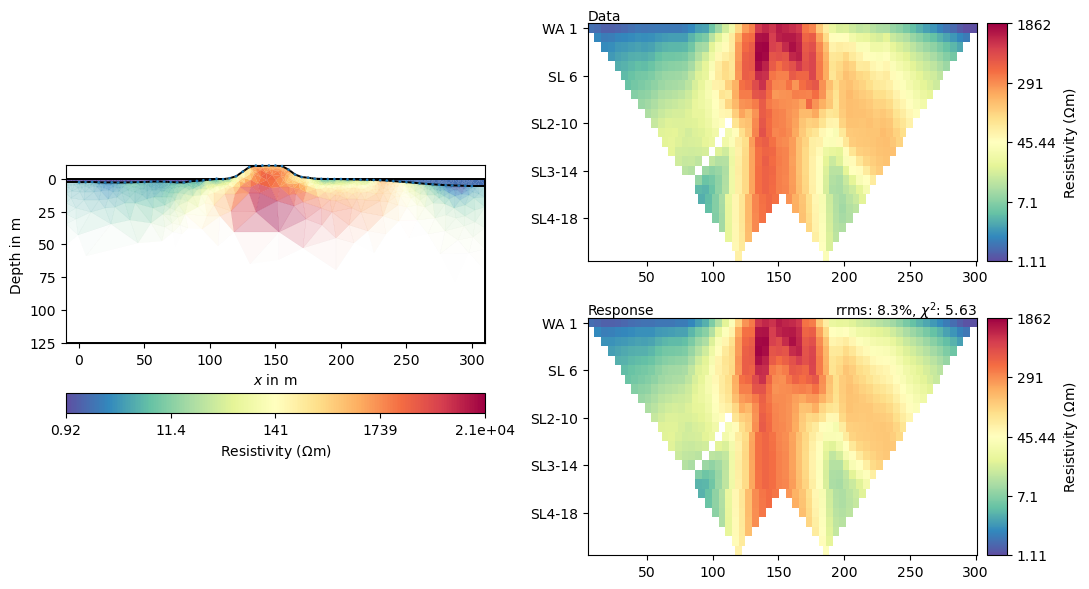

In [41]:
mgr.showResultAndFit()

16/10/24 - 10:10:53 - pyGIMLi - ERROR - None._drawField(c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\viewer\showmesh.py:392)
Data size invalid


Data:  2 0.922592535085096 1.6549158866565699 False
Mesh:  Mesh: Nodes: 766 Cells: 861 Boundaries: 667
cannot access local variable 'gci' where it is not associated with a value
Traceback (most recent call last):
  File "c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\viewer\showmesh.py", line 419, in showMesh
    gci, validData = _drawField(ax, mesh, data, kwargs)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\viewer\showmesh.py", line 399, in _drawField
    return gci, validData
           ^^^
UnboundLocalError: cannot access local variable 'gci' where it is not associated with a value


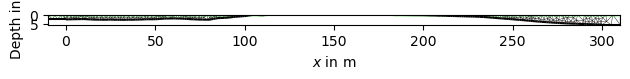

In [40]:
water = mesh.createSubMesh(mesh.cells((mesh.cellMarkers() == 3) | (mesh.cellMarkers() == 4)))
resWater = mgr.fw.model[len(mgr.model)-water.cellCount():]
ax, cb = pg.show(water, resWater)

15/10/24 - 11:34:43 - pyGIMLi - INFO - Found 4 regions.
15/10/24 - 11:34:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/10/24 - 11:34:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/10/24 - 11:34:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/10/24 - 11:34:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8560 Cells: 16244 Boundaries: 12620
15/10/24 - 11:34:44 - pyGIMLi - INFO - Use median(data values)=79.9238657698535
15/10/24 - 11:34:44 - pyGIMLi - INFO - Created startmodel from forward operator: 3824, min/max=79.923866/79.923866
15/10/24 - 11:34:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF22CC4720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF22C9C900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF3B151B60>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002BF3B151BD0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002BF3B151C40>
min/max (data): 1.11/1862
min/max (error): 3%/20.97%
min/max (start model): 79.92/79.92
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1898.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  719.87 (dPhi = 62.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  215.81 (dPhi = 69.70%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  107.60 (dPhi = 49.80%) lam: 20.0


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bf38ce9350>)

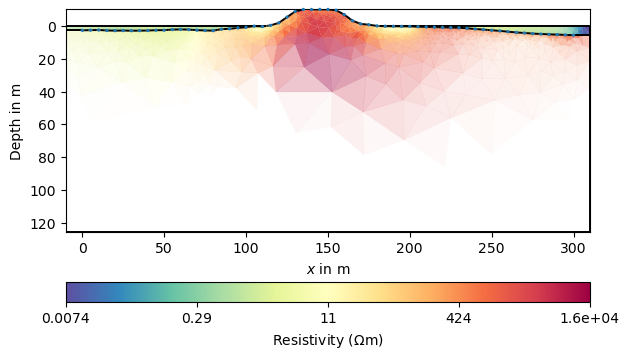

In [19]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, zWeight=0.5)
mgr.inv.setRegularization(4, zWeight=0.5)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

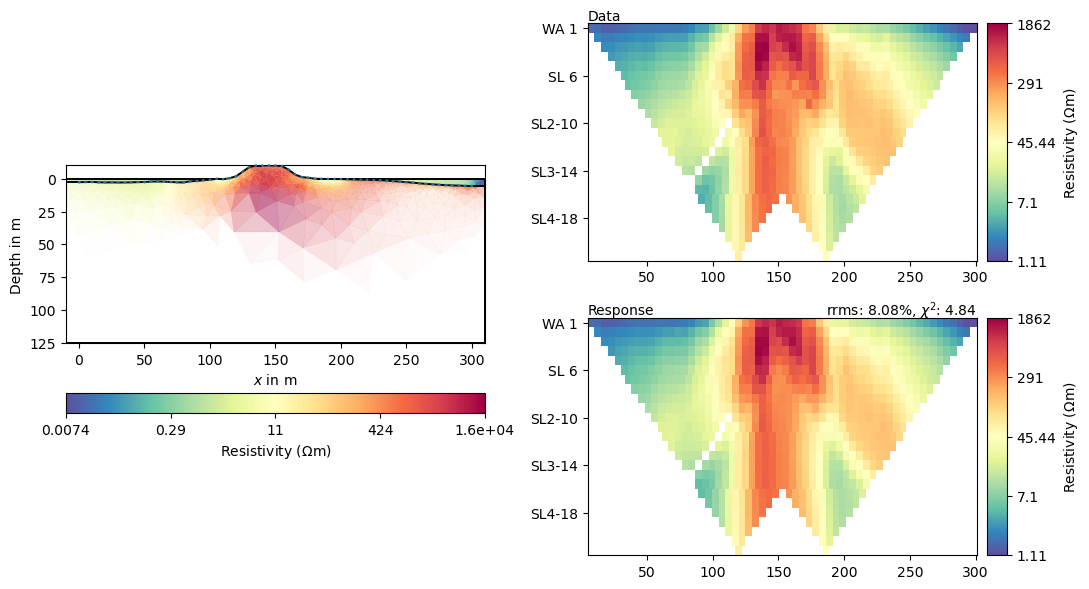

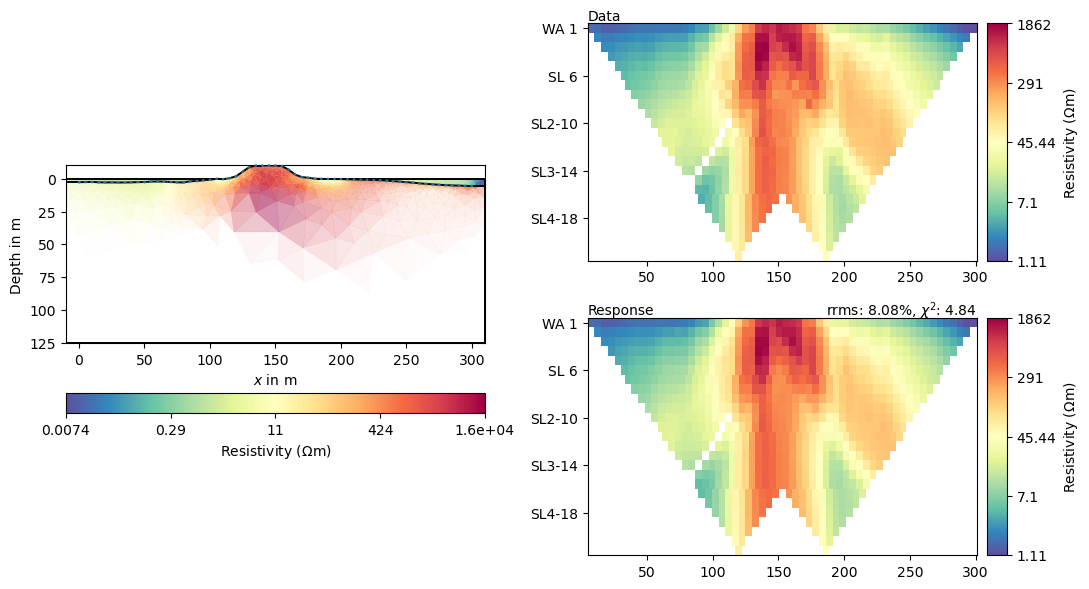

In [20]:
mgr.showResultAndFit()

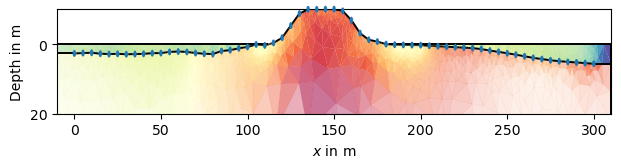

In [22]:
kw = dict(logScale=True, cMap="Spectral_r", colorBar=False)
ax, cb = mgr.showResult(**kw)
ax.set_ylim(-20)
ax.set_aspect(2)

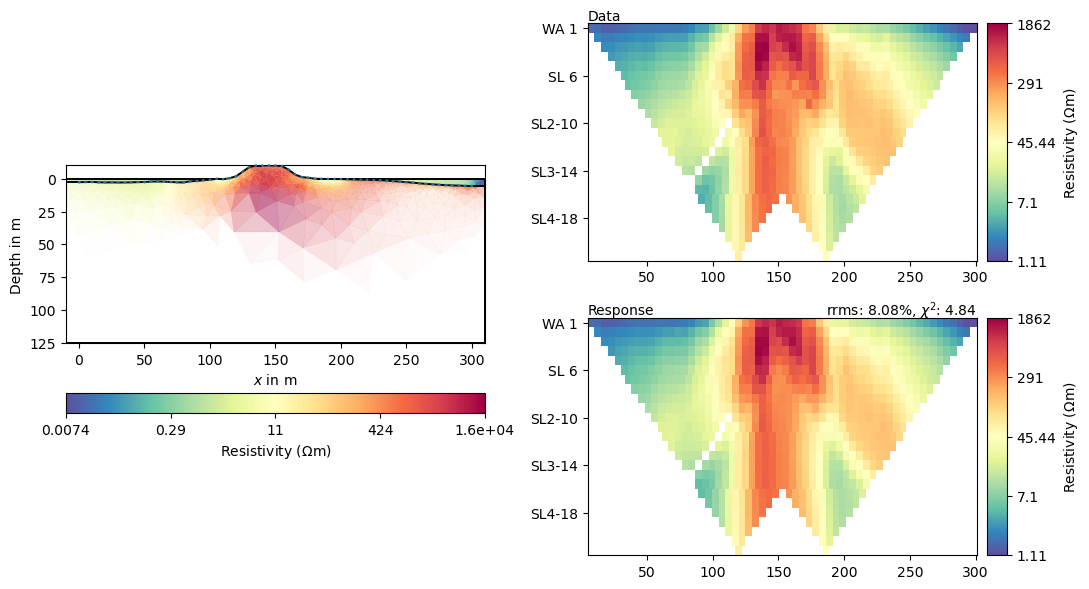

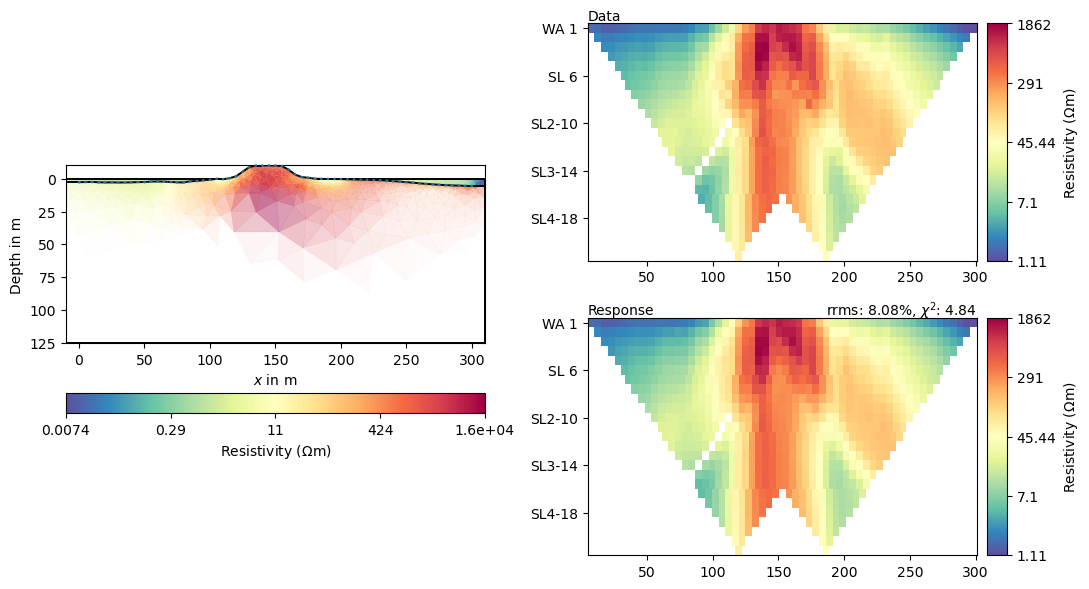

In [24]:
mgr.showResultAndFit()


16/10/24 - 10:16:48 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

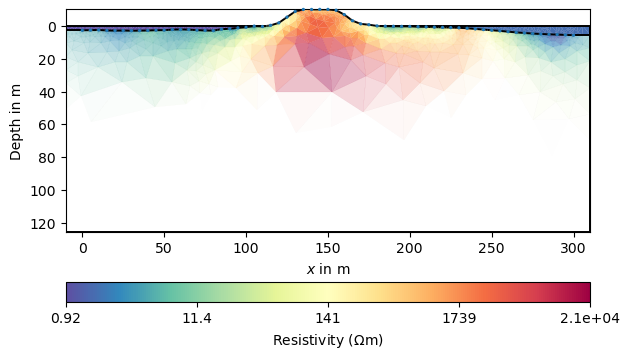

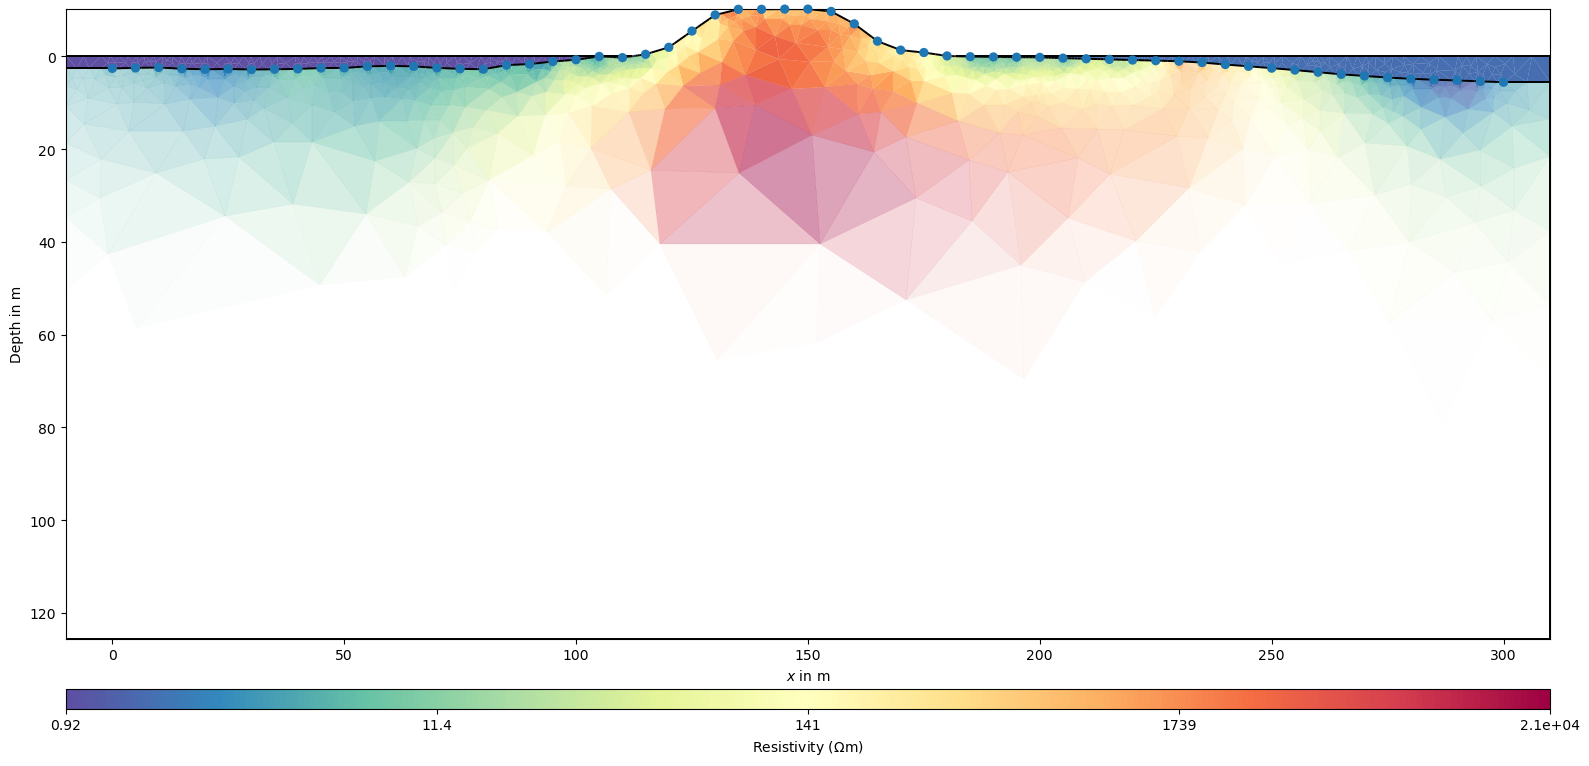

In [42]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_western_new_rhoa')

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2bf993854d0>)

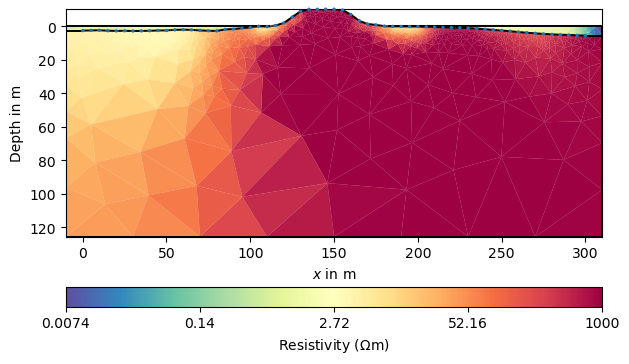

In [26]:
mgr.showResult(coverage=1, cMax=1000, cMap="Spectral_r", logScale=True)

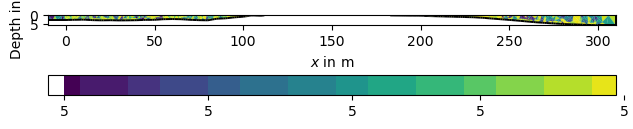

In [34]:
water = mesh.createSubMesh(mesh.cells((mesh.cellMarkers() == 3) | (mesh.cellMarkers() == 4)))
resWater = mgr.fw.model[len(mgr.model)-water.cellCount():]
ax, cb = pg.show(water, resWater)

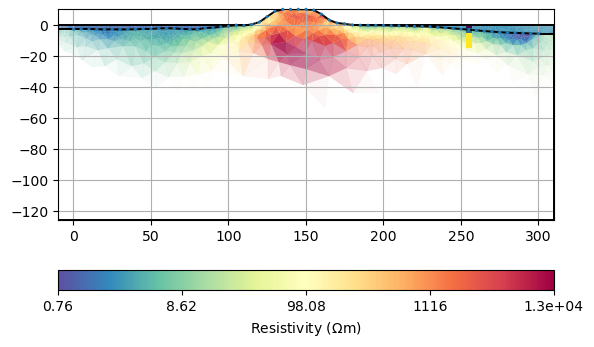

In [17]:


borehole2 = pd.read_csv(dir + "pygimli/borehole2.csv")

x = borehole2['x']
z = borehole2['z']
r = borehole2['r']



ax, cb = mgr.showResult(logscale=True)
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, logscale=True, **colkw)

ax.grid(True)
#ax.set_ylim(-5)

In [28]:
with open(dir+'processing/shoreline/joined_west.pkl', 'rb') as f:
    joined_west = pickle.load(f)

In [29]:
westshore = joined_west[['year', 'xc', 'zc']].to_numpy()
westshore[:, 1] = westshore[:, 1].round(decimals=0)
westshore[:, 2] = westshore[:, 2].round(decimals=1)

In [30]:
posVec2 = [pg.Pos(pos) for pos in zip(westshore[:, 1], westshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))

fopDP = PriorModelling(para, posVec2)

# Get the model values for all positions
resMesh2 = fopDP(mgr.model)
# Create a mesh and set cell markers

#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out2 = np.column_stack((westshore[:, 1], westshore[:, 2], resMesh2, westshore[:, 0]))
out2 = np.c_[ out2, 2023 - out2[:, 3] ] 
out2

15/10/24 - 11:44:02 - pyGIMLi - INFO - Found 1 regions.


array([[ 284.        ,   -5.3       ,  397.22407368, 1964.        ,
          59.        ],
       [ 284.        ,   -6.        ,  385.70627651, 1964.        ,
          59.        ],
       [ 284.        ,   -6.7       ,  385.70627651, 1964.        ,
          59.        ],
       ...,
       [ 173.        ,  -40.4       , 4344.96795416, 2023.        ,
           0.        ],
       [ 173.        ,  -45.        , 4344.96795416, 2023.        ,
           0.        ],
       [ 173.        ,  -50.1       , 4344.96795416, 2023.        ,
           0.        ]])

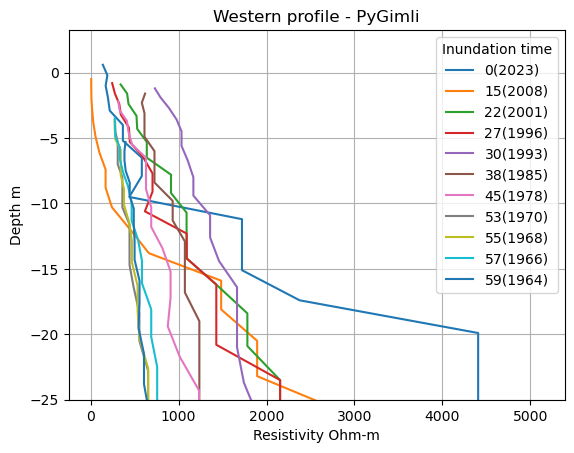

In [31]:
# Extracting unique years from the data
years = np.unique(out2[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = out2[out2[:, 4] == year]
    
    # Sorting the data based on depth
    data_year = data_year[data_year[:, 1].argsort()]
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-25)
plt.xlabel('Resistivity Ohm-m')
plt.title('Western profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()

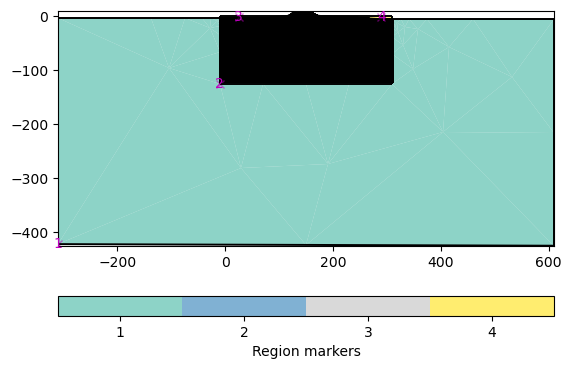

In [18]:
from pygimli.frameworks import PriorModelling
import numpy as np
import pygimli as pg

topography_coords = np.loadtxt(dir + "res2dinv_inputs/western_topo.txt")
xmin = -10
xmax = 310
ymin = -120
resolution_x = 0.25
resolution_y = 0.25
shave_off_top = 0.25  # Amount to shave off from the top

# Interpolate topography points
interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')

# Create x coordinates for the grid
x = np.arange(xmin, xmax + resolution_x, resolution_x)

# Create an empty list to store the adjusted y-values
adjusted_topography = []

# Iterate over each x-coordinate and adjust the corresponding y-value by subtracting the shave off value
for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  # Ensure the adjusted y-value doesn't go below ymin
    adjusted_topography.append(adjusted_y_val)

# Convert the list of adjusted y-values to a numpy array
adjusted_topography = np.array(adjusted_topography)

# Create a positional vector
grid_points = []
for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

# Convert the list of grid points to a numpy array
grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]

# Plot the results

ax, _ = pg.show(plc2)
ax.scatter(grid_points[:, 0], grid_points[:, 1], s=1, color='black')  # Plot grid points



    



In [19]:
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec)

# Get the model values for all positions
resMesh = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

21/05/24 - 10:30:19 - pyGIMLi - INFO - Found 1 regions.


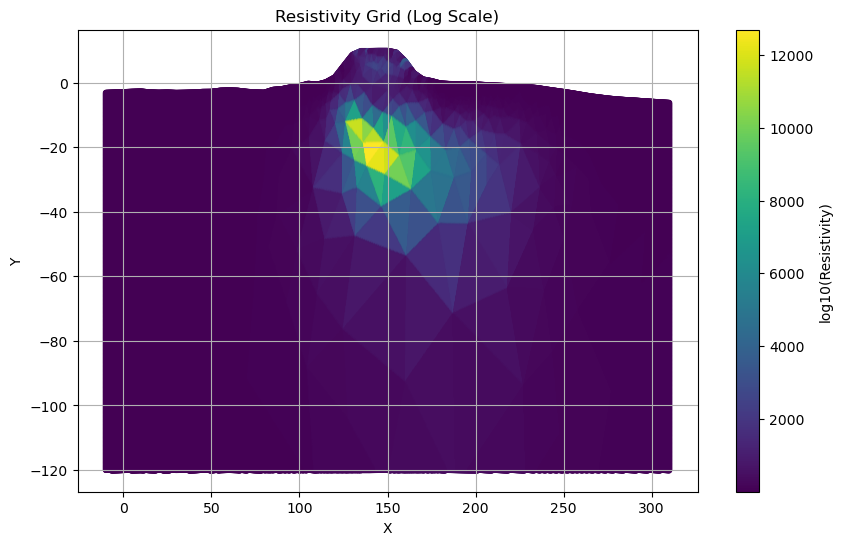

In [20]:

x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]


plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=resistivity_values, cmap='viridis', s=10)  # Apply log10 to resistivity values
plt.colorbar(label='log10(Resistivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Resistivity Grid (Log Scale)')
plt.grid(True)
plt.show()

In [81]:
permafrost_data = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    
    negative_gradients_mask = (data_x[:, 2] > 10) & (resistivity_gradient_log < 0)
    valid_depths = data_x[:, 1][negative_gradients_mask]
    valid_gradients = resistivity_gradient_log[negative_gradients_mask]

    # If valid depths are found, take the first one
    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

# Convert permafrost_data to numpy array
top_permafrost_depths = np.array(permafrost_data)

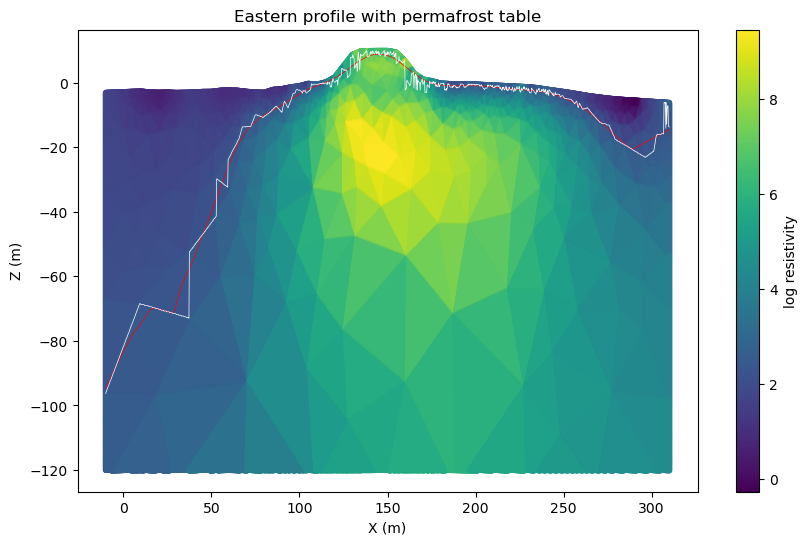

In [82]:
import statsmodels.api as sm
# Assuming 'out_with_ibpt' contains the original data with an additional column for IBPT depth
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0]  # Assuming the IBPT depth is stored in the last column

# Plotting
plt.figure(figsize=(10, 6))

# Plot resistivity values
plt.scatter(x_values, y_values, c=np.log(resistivity_values),cmap='viridis', s=10)  # Adjust s for point size
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Eastern profile with permafrost table')

# Plot IBPT depth as horizontal lines

# Apply moving average filter to smoothen the IBPT depth line
lowess = sm.nonparametric.lowess
frac = 0.1  # The fraction of the data used when estimating each y-value
ibpt_depth_smoothed = lowess(ibpt_depth, ibpt_x, frac=frac)[:, 1]

np.save(dir+ 'pygimli/western_perm_table_smooth.npy', ibpt_depth_smoothed)
np.save(dir+ 'pygimli/western_perm_table.npy', ibpt_depth)
np.save(dir+ 'pygimli/western_perm_table_x.npy', ibpt_x)

# Plot smoothened IBPT depth line
plt.plot(ibpt_x, ibpt_depth_smoothed, color='r', linewidth=0.5)
plt.plot(ibpt_x, ibpt_depth, color='w', linewidth=0.5)
#plt.plot(ibpt_x, adjusted_topography+0.5, color='b', linewidth=0.5)
# lower to higher
plt.show()

(-40.0, 11.190451296625003)

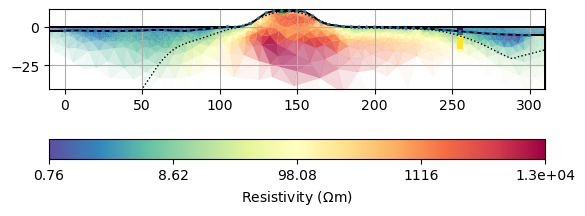

In [60]:
from pygimli.viewer.mpl import draw1DColumn

borehole4 = pd.read_csv(dir + "pygimli/borehole2.csv")
AL = np.loadtxt(dir + "pygimli/AL_western.txt")

x = borehole4['x']
z = borehole4['z']
r = borehole4['r']

x_AL = AL[0]
z_AL = AL[1]

ax, cb = mgr.showResult()
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, **colkw)
ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g_', linewidth=0.1)
ax.grid(True)
ax.set_ylim(-40)

In [49]:
z_AL

-0.38

In [ ]:
ddir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/mehriban/10_Aug_KamikF38/res2dinv_inputs/'
dd = ert.load(ddir+'DD_ele_nogps.dat')
dd.save(ddir+"dd.txt", "a b m n err rhoa")
print(open(ddir+"dd.txt").read())



In [ ]:
ws = ert.load(ddir+"WS_ele_gps_noerror.dat")
ws.save(ddir+"ws.txt", "a b m n err rhoa")
print(open(ddir+"ws.txt").read())

In [ ]:
wsrec = ert.load(ddir+"WS_rec_ele_nogps_noerror.dat")
wsrec.save(ddir+"wsrec.txt", "a b m n err rhoa")
print(open(ddir+"wsrec.txt").read())